In [1]:
from pdrtpy.measurement import Measurement
from pdrtpy.modelset import ModelSet
from pdrtpy.plot.modelplot import ModelPlot
import pdrtpy.pdrutils as utils
from pdrtpy.tool.lineratiofit import LineRatioFit
from pdrtpy.plot.lineratioplot import LineRatioPlot
from astropy.nddata import StdDevUncertainty
import astropy.units as u
import numpy as np
#from lmfit import Model, Parameters, Minimizer, minimize, fit_report
import corner

/home/mpound/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1161: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


In [2]:
from pdrtpy import version
version()

'2.2.2-interpolate'

### Data for pillar

In [3]:
myunit = "erg s-1 cm-2 sr-1" 
intensity = {
    "CII_158": 1.2E-3,
    "CO_32": 4.3E-6,
    "OI_63": 6.4E-3,
    "FIR": 0.9
}
error = {
    "CII_158": 1.83E-5,
    "CO_32": 2.54E-8,
    "OI_63": 3.30E-4,
    "FIR": 0.2*intensity["FIR"]  #guess 20%??
}
a = []
for k in intensity:
    a.append(Measurement(data=intensity[k],uncertainty = StdDevUncertainty(error[k]),identifier=k,unit=myunit))
for m in a:
    print(f'{m.id:>7s}  {m:3.2e}')

CII_158  1.20e-03 +/- 1.83e-05 erg / (cm2 s sr)
  CO_32  4.30e-06 +/- 2.54e-08 erg / (cm2 s sr)
  OI_63  6.40e-03 +/- 3.30e-04 erg / (cm2 s sr)
    FIR  9.00e-01 +/- 1.80e-01 erg / (cm2 s sr)


## Mark has new WK 2020 models as of 10/15

In [4]:
ms = ModelSet("wk2020",z=1)
#ms.table.show_in_notebook()

### Do the fit with standard least squares, which is the default *method* to run()

In [5]:
p = LineRatioFit(ms,a)

p2 = LineRatioFit(ms,a)
p.run(test=False,fine=True)
print(f' n = {p.density:.2e}\nG0 = {p.radiation_field:.2e}')

/home/mpound/src/pdrtpy/pdrtpy/tool/lineratiofit.py:354: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()


fitted 1 of 1 pixels
got 0 exceptions
 n = 9.13e+03 +/- 3.56e+02 1 / cm3
G0 = 3.68e+00 +/- 4.54e-01 erg / (cm2 s)


In [110]:
p.run(test=True,fine=True)
print(f' n = {p.density:.2e}\nG0 = {p.radiation_field:.2e}')

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mpound/src/pdrtpy/pdrtpy/tool/lineratiofit.py:354: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()


QQ SHAPE  (57, 49)
QQ WCS WCS Keywords

Number of WCS axes: 2
CTYPE : 'log(n)'  'log(FUV)'  
CRVAL : 1.0  -3.295880079  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.125  0.125  
NAXIS : 49  57
QQ SHAPE  (57, 49)
QQ WCS WCS Keywords

Number of WCS axes: 2
CTYPE : 'log(n)'  'log(FUV)'  
CRVAL : 1.0  -3.295880079  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.125  0.125  
NAXIS : 49  57
QQ SHAPE  (57, 49)
QQ WCS WCS Keywords

Number of WCS axes: 2
CTYPE : 'log(n)'  'log(FUV)'  
CRVAL : 1.0  -3.295880079  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.125  0.125  
NAXIS : 49  57
QQ SHAPE  (57, 49)
QQ WCS WCS Keywords

Number of WCS axes: 2
CTYPE : 'log(n)'  'log(FUV)'  
CRVAL : 1.0  -3.295880079  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.125  0.125  
NAXIS : 49  57
fitted 1 of 1 pixels
got 0 exceptions
 n = 9.13e+03 +/- 3.56e+02 1 / cm3
G0 = 3.

In [112]:
p.run(test=False,fine=True)
print(f' n = {p.density:.2e}\nG0 = {p.radiation_field:.2e}')

fitted 1 of 1 pixels
got 0 exceptions
 n = 9.13e+03 +/- 3.56e+02 1 / cm3
G0 = 3.68e+00 +/- 4.54e-01 erg / (cm2 s)


In [ ]:
key='CII_158/CO_32'
print(p._residual[key].header['BUNIT'])
print(p._observedratios[key].header['BUNIT'],
      p._observedratios[key].is_single_pixel(),
      p._observedratios[key].wcs==None)
print(p._residual[key].wcs)
print(p._residual[key].get(9.13e+03,3.68e+00)[0])
np.shape(p._residual[key])

In [ ]:
x,y=utils.get_xy_from_wcs(p._residual[key])
print(len(x),len(y))
np.nanmean(p._residual[key].data[0][0])

In [ ]:
from astropy.wcs import WCS
x=WCS(p._chisq.header)
p._residual['CII_158/CO_32'].header

### The fit resuls are stored in a *FitMap*, where each pixel contains a instance of an *MinimizerResult*.   
See https://lmfit.github.io/lmfit-py/fitting.html#minimizerresult-the-optimization-result

Since this is a single pixel example, the result is in index 0.

In [7]:
p.fit_result[0]

In [ ]:
print(p._fitresult[0].success, p._fitresult[0].errorbars)

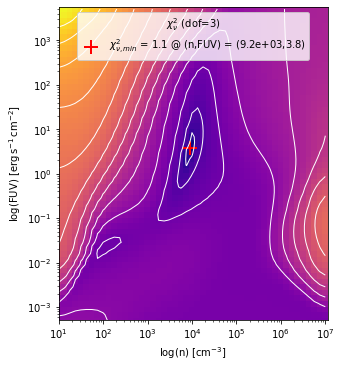

In [38]:
plot = LineRatioPlot(p)
plot.reduced_chisq(legend=True,norm='log')

In [ ]:
plot.overlay_all_ratios(yaxis_unit='Habing',legend=True,measurements=a[0:2],loc='upper left',bbox_to_anchor=(1.05,0.9),figsize=(7,5))

In [ ]:
plot.ratios_on_models(image=True,ncols=2,meas_color=['#4daf4a'],norm='log')

### Let's get all Bayesian up in this crib
Instead of LSQ, you can use the emcee package to do Monte Carlo Markov Chain analysis to determine n and G0.
Note: this takes a few minutes.

*Caution: Do not use this method for maps!*

In [107]:
p.run(method="emcee",steps=5000,fine=True,test=False)

100%|██████████| 5000/5000 [13:35<00:00,  6.13it/s]


fitted 1 of 1 pixels
got 0 exceptions


In [10]:
p._fitresult[0]
#print(p._fitresult[0].success, p._fitresult[0].errorbars)

In [ ]:
p.radiation_field

In [105]:
p2.run(method="emcee",steps=5000,walkers=2)
p2._fitresult[0]

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mpound/src/pdrtpy/pdrtpy/tool/lineratiofit.py:354: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
print(p.radiation_field,p.density)
print(p2.radiation_field,p2.density)
print(f' n = {p.density:.2e}\nG0 = {utils.to("Habing",p.radiation_field):.2e}')

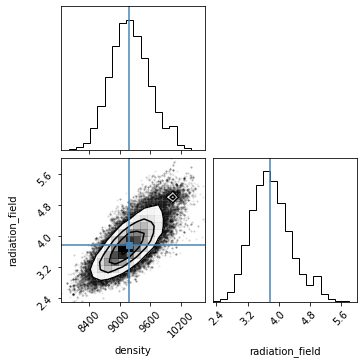

In [11]:
res = p.fit_result[0]
fig = corner.corner(res.flatchain, labels=res.var_names, truths=list(res.params.valuesdict().values()))

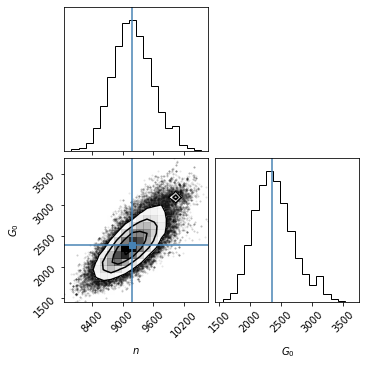

In [12]:
from copy import deepcopy
scale = 1.6E-3 # 1 habing = 1.6E-3 erg s-1 cm-2
rescopy = deepcopy(res.flatchain)
rescopy['radiation_field'] /= scale
# now scale the "best fit" values where the cross hairs are plotted.
truths=np.array(list(res.params.valuesdict().values()))
truths[1] /=scale
fig = corner.corner(rescopy, labels=["$n$","$G_0$"], truths=truths)

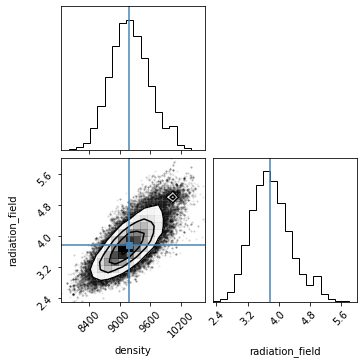

In [14]:
res = p.fit_result[0]
fig = corner.corner(res.flatchain, labels=res.var_names, truths=list(res.params.valuesdict().values()))

In [93]:
res.flatchain
H,X,Y = np.histogram2d(res.flatchain["density"],res.flatchain["radiation_field"],bins=20)

levels= 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Compute the density levels.
Hflat = H.flatten()
inds = np.argsort(Hflat)[::-1]
Hflat = Hflat[inds]
sm = np.cumsum(Hflat)
sm /= sm[-1]
V = np.empty(len(levels))
for i, v0 in enumerate(levels):
    try:
        V[i] = Hflat[sm <= v0][-1]
    except IndexError:
        V[i] = Hflat[0]
V.sort()
m = np.diff(V) == 0
if np.any(m) and not quiet:
    logging.warning("Too few points to create valid contours")
while np.any(m):
    V[np.where(m)[0][0]] *= 1.0 - 1e-4
    m = np.diff(V) == 0
V.sort()


/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The following kwargs were not used by contour: 'color'
  """Entry point for launching an IPython kernel.


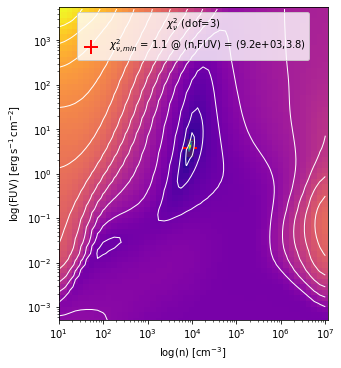

In [53]:
plot._axis[0].contourf(X[1:],Y[1:],H)
#plot._figure

In [97]:
from matplotlib.colors import LinearSegmentedColormap, colorConverter
color="k"
density_cmap = LinearSegmentedColormap.from_list(
    "density_cmap", [color, (1, 1, 1, 0)]
)

# This color map is used to hide the points at the high density areas.
white_cmap = LinearSegmentedColormap.from_list(
    "white_cmap", [(1, 1, 1), (1, 1, 1)], N=2
)


/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


3418.0

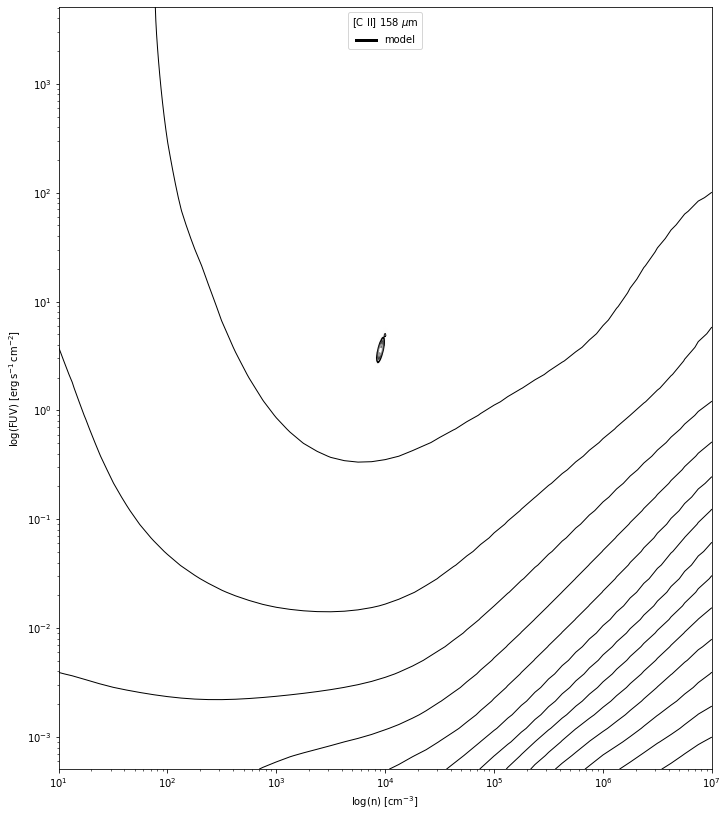

In [104]:
mp = ModelPlot(ms)
mp.plot("CII_158",figsize=(10,15),image=False)#,xlim=[7800,10400],ylim=[2.4,5.8])
qs=mp._axis[0].pcolor(X[:-1],Y[:-1],H.max() - H.T,cmap=density_cmap)
qs=mp._axis[0].contour(X[:-1],Y[:-1],H.T,V,cmap='gray')#,aspect='equal
np.max(H)

### Data for p1

In [ ]:
myunit = "erg s-1 cm-2 sr-1" 
intensity = {
    "CII_158": 1.2E-3,
    "CO_32": 4.3E-6,
    "OI_63": 6.4E-3,
    "FIR": 0.9,
    "H200S1":6.6E-5,
    "H200S2":1.5E-4
}
error = {
    "CII_158": 1.83E-5,
    "CO_32": 2.54E-8,
    "OI_63": 3.30E-4,
    "FIR": 0.2*intensity["FIR"],  #guess 20%??
    "H200S1": 8.7E-6,
    "H200S2": 1.26E-5
}
a = []
for k in intensity:
    a.append(Measurement(data=intensity[k],uncertainty = StdDevUncertainty(error[k]),identifier=k,unit=myunit))
for m in a:
    print(f'{m.id:>7s}  {m:3.2e}')

In [ ]:
p1 = LineRatioFit(ms,a)
p1.run()
print(f' n = {p1.density:.2e}\nG0 = {p1.radiation_field:.2e}')
p1.fit_result[0]

In [ ]:
plot1 = LineRatioPlot(p1)
plot1.reduced_chisq(legend=True,norm='log')

In [ ]:
plot1.overlay_all_ratios(measurements=a[0:2]+a[4:6],legend=True,loc='upper left',bbox_to_anchor=(1.05,0.9),figsize=(7,5))

In [ ]:
plot1.ratios_on_models(image=True,ncols=2,meas_color=['#4daf4a'],norm='log')

### You can pass some emcee keywords to *run()*
More steps means a longer time to compute, but will ensure the chain is long enough.

See https://lmfit.github.io/lmfit-py/fitting.html#lmfit.minimizer.Minimizer.emcee

In [ ]:
p1.run(method="emcee", steps=2050, burn=50)

#### You can modify the corner plot, changing the labels or using other available keywords.
See https://corner.readthedocs.io/en/latest/api.html

In [ ]:
res = p1.fit_result[0]
fig = corner.corner(res.flatchain, labels=['n','$G_0$'], truths=list(res.params.valuesdict().values()))
print(f' n = {p1.density:.2e}\nG0 = {p1.radiation_field:.2e}')

In [ ]:
zz = Measurement([[1,2,3],[4,5,6]],uncertainty=None,unit="K")

In [ ]:
np.reshape(zz,zz.size)

In [ ]:
zz.data.flatten()